In [2]:
# import sys
# from pathlib import Path

# # Get the absolute path to the project root
# notebook_path = Path('/Users/nirmal/Documents/np_research/ManGo_code/ManGo')
# project_root = str(notebook_path)

# # Add the project root to Python path if it's not already there
# if project_root not in sys.path:
#     sys.path.insert(0, project_root)

# # Now you can import your module
# from src.models.mg_rig_wrp import GnosticRobustRegressor

# # Verify the import worked
# # print(f"Project root: {project_root}")
# # print(f"Available at: {RobustRegressor.__module__}")

In [3]:
import pandas as pd
import mlflow.pyfunc
from mlflow.models.signature import infer_signature
from machinegnostics.models import RobustRegressor
import numpy as np
# Create and train the model
model = RobustRegressor(degree=3, mg_loss='hi', verbose=True)
X = np.random.rand(100, 2)
y = np.random.rand(100)
model.fit(X, y)

# Create an input example
input_example = pd.DataFrame(X, columns=["feature1", "feature2"])

# Infer the model signature
signature = infer_signature(input_example, model.predict( input_example))

# Log the model to MLflow with input_example and signature
with mlflow.start_run():
    mlflow.pyfunc.log_model(
        artifact_path="robust_regressor",
        python_model=model,
        registered_model_name="GnosticRobustRegressor",
        input_example=input_example,
        signature=signature
    )

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and 

Iteration: 1 - Machine Gnostic loss - hi : 83.6144, rentropy: 26.6008
Iteration: 2 - Machine Gnostic loss - hi : 83.0533, rentropy: 33.6648
Iteration: 3 - Machine Gnostic loss - hi : 82.6491, rentropy: 42.3379
Iteration: 4 - Machine Gnostic loss - hi : 82.2369, rentropy: 48.4348
Iteration: 5 - Machine Gnostic loss - hi : 82.1769, rentropy: 51.5256
Iteration: 6 - Machine Gnostic loss - hi : 82.3018, rentropy: 53.4291
Iteration: 7 - Machine Gnostic loss - hi : 82.4846, rentropy: 55.2639
Iteration: 8 - Machine Gnostic loss - hi : 82.6059, rentropy: 56.4167
Iteration: 9 - Machine Gnostic loss - hi : 82.6989, rentropy: 57.2654
Iteration: 10 - Machine Gnostic loss - hi : 82.7688, rentropy: 57.8612
Iteration: 11 - Machine Gnostic loss - hi : 82.8214, rentropy: 58.241
Iteration: 12 - Machine Gnostic loss - hi : 82.8607, rentropy: 58.4469
Iteration: 13 - Machine Gnostic loss - hi : 82.8865, rentropy: 58.5172
Iteration: 14 - Machine Gnostic loss - hi : 82.9033, rentropy: 58.5133
Iteration: 15 - 

2025/05/26 20:22:44 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2025-04-15; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'machinegnostics'}
Registered model 'GnosticRobustRegressor' already exists. Creating a new version of this model...
Created version '14' of model 'GnosticRobustRegressor'.


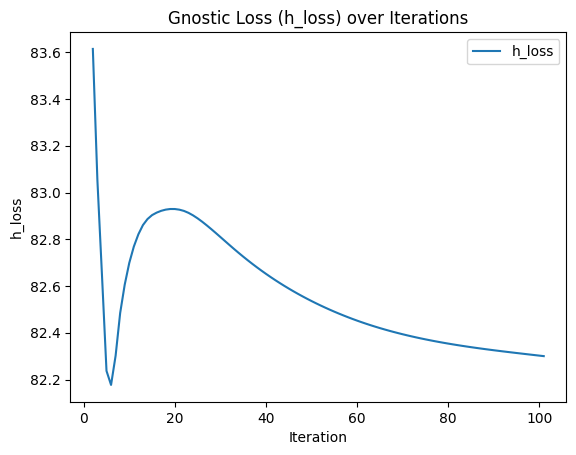

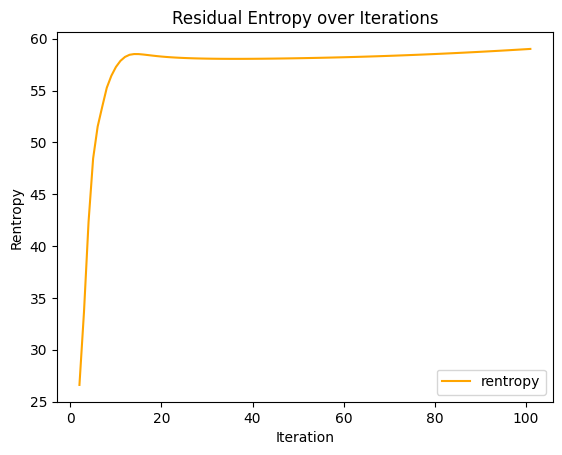

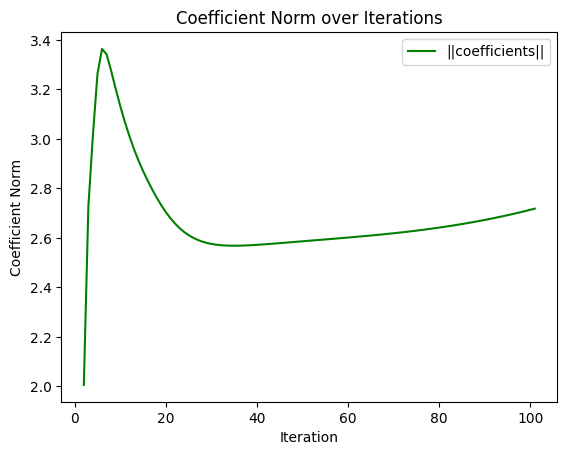

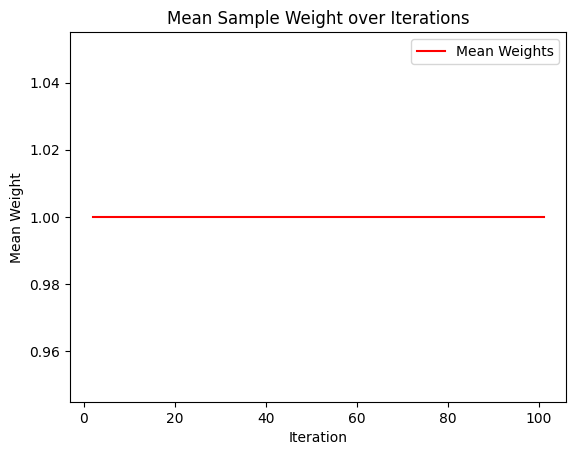

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert history to DataFrame if it's a list of dicts
if isinstance(model._history, list):
    history_df = pd.DataFrame(model._history)
else:
    history_df = pd.DataFrame([model._history])

# Plot h_loss if present
if 'h_loss' in history_df.columns and history_df['h_loss'].notnull().any():
    plt.plot(history_df['iteration'], history_df['h_loss'], label='h_loss')
    plt.xlabel('Iteration')
    plt.ylabel('h_loss')
    plt.title('Gnostic Loss (h_loss) over Iterations')
    plt.legend()
    plt.show()

# Plot rentropy if present
if 'rentropy' in history_df.columns and history_df['rentropy'].notnull().any():
    plt.plot(history_df['iteration'], history_df['rentropy'], label='rentropy', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Rentropy')
    plt.title('Residual Entropy over Iterations')
    plt.legend()
    plt.show()

# Plot coefficients norm if present
if 'coefficients' in history_df.columns and history_df['coefficients'].notnull().any():
    coef_norms = history_df['coefficients'].apply(lambda x: np.linalg.norm(x) if x is not None else np.nan)
    plt.plot(history_df['iteration'], coef_norms, label='||coefficients||', color='green')
    plt.xlabel('Iteration')
    plt.ylabel('Coefficient Norm')
    plt.title('Coefficient Norm over Iterations')
    plt.legend()
    plt.show()

# Plot mean weights if present
if 'weights' in history_df.columns and history_df['weights'].notnull().any():
    mean_weights = history_df['weights'].apply(lambda x: np.mean(x) if x is not None else np.nan)
    plt.plot(history_df['iteration'], mean_weights, label='Mean Weights', color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Weight')
    plt.title('Mean Sample Weight over Iterations')
    plt.legend()
    plt.show()

In [5]:
# Load the model from MLflow
loaded_model = mlflow.pyfunc.load_model("models:/GnosticRobustRegressor/1")

# Use the model for predictions
import pandas as pd
X_test = pd.DataFrame(np.random.rand(10, 2), columns=["feature1", "feature2"])
predictions = loaded_model.predict(X_test)
print(predictions)

[0.52935668 0.51323633 0.58902325 0.5946042  0.48374018 0.62846496
 0.46788694 0.49396877 0.5062205  0.53765763]


In [6]:
import numpy as np
import pandas as pd
import mlflow
import mlflow.pyfunc
from mlflow.models.signature import infer_signature
from machinegnostics.models import RobustRegressor  # Replace with your actual import path

# Step 1: Set up MLflow experiment
# mlflow.set_experiment("Robust Regressor Experiment")

# Step 2: Generate synthetic data
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 2.5 * X[:, 0] + 1.5 * X[:, 1] + np.random.normal(scale=0.1, size=100)  # Linear relationship with noise

# Step 3: Train the model
model = RobustRegressor(degree=3, mg_loss='hi', verbose=True)
model.fit(X, y)

# Step 4: Create an input example and infer the model signature
input_example = pd.DataFrame(X, columns=["feature1", "feature2"])
signature = infer_signature(model_input=input_example, model_output=y)

# Step 5: Log the model, parameters, and metrics to MLflow
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("degree", 3)
    mlflow.log_param("mg_loss", "hi")
    mlflow.log_param("verbose", True)

    # Log metrics (example: training RMSE)
    y_pred = model.predict(input_example)
    rmse = np.sqrt(np.mean((y - y_pred) ** 2))
    mlflow.log_metric("train_rmse", rmse)

    # Safely log rentropy and h_loss if available and not None
    rentropy = None
    h_loss = None
    if hasattr(model, "_history"):
        hist = model._history
        # If history is a dict of lists
        if isinstance(hist, dict):
            if "rentropy" in hist and hist["rentropy"] and hist["rentropy"][-1] is not None:
                rentropy = hist["rentropy"][-1]
            if "h_loss" in hist and hist["h_loss"] and hist["h_loss"][-1] is not None:
                h_loss = hist["h_loss"][-1]
        # If history is a list of dicts
        elif isinstance(hist, list) and len(hist) > 0:
            if "rentropy" in hist[-1] and hist[-1]["rentropy"] is not None:
                rentropy = hist[-1]["rentropy"]
            if "h_loss" in hist[-1] and hist[-1]["h_loss"] is not None:
                h_loss = hist[-1]["h_loss"]

    if rentropy is not None:
        mlflow.log_metric('train_rentropy', rentropy)
    if h_loss is not None:
        mlflow.log_metric('train_h_loss', h_loss)

    # Log the model
    mlflow.pyfunc.log_model(
        artifact_path="robust_regressor",
        python_model=model,
        registered_model_name="LogisticRobustRegressor",
        input_example=input_example,
        signature=signature
    )

2025/05/26 20:22:44 INFO mlflow.pyfunc: Validating input example against model signature


Iteration: 1 - Machine Gnostic loss - hi : 84.5067, rentropy: 72.9582
Iteration: 2 - Machine Gnostic loss - hi : 83.9372, rentropy: 67.5298
Iteration: 3 - Machine Gnostic loss - hi : 83.6534, rentropy: 66.1964
Iteration: 4 - Machine Gnostic loss - hi : 83.3981, rentropy: 63.8556
Iteration: 5 - Machine Gnostic loss - hi : 83.1641, rentropy: 61.479
Iteration: 6 - Machine Gnostic loss - hi : 82.9848, rentropy: 59.6505
Iteration: 7 - Machine Gnostic loss - hi : 82.8593, rentropy: 58.3318
Iteration: 8 - Machine Gnostic loss - hi : 82.777, rentropy: 57.3771
Iteration: 9 - Machine Gnostic loss - hi : 82.7244, rentropy: 56.6606
Iteration: 10 - Machine Gnostic loss - hi : 82.6892, rentropy: 56.091
Iteration: 11 - Machine Gnostic loss - hi : 82.6637, rentropy: 55.6188
Iteration: 12 - Machine Gnostic loss - hi : 82.6435, rentropy: 55.2121
Iteration: 13 - Machine Gnostic loss - hi : 82.626, rentropy: 54.8499
Iteration: 14 - Machine Gnostic loss - hi : 82.6099, rentropy: 54.5187
Iteration: 15 - Mac

2025/05/26 20:22:46 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2025-04-15; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'machinegnostics'}
Registered model 'LogisticRobustRegressor' already exists. Creating a new version of this model...
Created version '4' of model 'LogisticRobustRegressor'.


In [7]:
# save model
model.save_model("robust_regressor_model.pkl")

In [12]:
# read model and make predictions
loaded_model = model.load_model("robust_regressor_model.pkl")
# Use the loaded model for predictions
X_test = pd.DataFrame(np.random.rand(10, 2), columns=["feature1", "feature2"])
predictions = loaded_model.predict(X_test)
print(predictions)

[1.81046568 3.42529104 1.19704633 1.27808932 2.813423   1.90949723
 0.98849647 2.36107142 1.64637205 3.31035596]


In [13]:
# Step 6: Load the model from MLflow
loaded_model = mlflow.pyfunc.load_model("models:/LogisticRobustRegressor/4")

# Step 7: Use the loaded model for predictions
# X_test = pd.DataFrame(np.random.rand(10, 2), columns=["feature1", "feature2"])
predictions = loaded_model.predict(X_test)
print("Predictions:")
print(predictions)

Predictions:
[1.81046568 3.42529104 1.19704633 1.27808932 2.813423   1.90949723
 0.98849647 2.36107142 1.64637205 3.31035596]
